In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
import plotnine
from plotnine import *
from plotnine import data
from scipy.stats import sem,t

### Все данные пациентов 

In [3]:
hd=pd.DataFrame({'ФИО':['Рабаданова Г.М.','Мухаметшин А. И.','Амхаева И.И.','Богданов А.Р.','Ситдикова М.Г.','Евграфова В.В.','Миронов В. В.','Мисалимов А.А.',
                            'Ильина Л.Н.','Агапова Е. Р.', 'Хабибулина А.Р.'],'Возраст':[55,32,28,26,48,41,31,38,47,47,31],'Пол': ['Ж','М','Ж','М',
                            'Ж','Ж','М','М','Ж','Ж','Ж'], 'ВАШ':[3,3,4,6,5,4,5,5,7,8,6],'HADS/T':[7,5,7,5,9,9,4,7,8,16,7],'HADS/D':[3,4,16,6,4,13,9,3,6,4,8],
                   'HIT-6':[62,58,63,48,63,43,55,57,57,55,61], 'HALT':[28,34,34,3,3,16,16,5,25,11,17],'HALT-JOB':[0,5,1,0,0,0,3,0,0,0,0],'HALT-DA':[10,12,18,0,0,5,7,2,5,0,8],
                 'HALT-HW':[10,5,5,0,3,5,3,0,5,6,3], 'HALT-1/2HW':[5,10,10,3,0,5,2,2,15,5,6],'HALT-FANS':[3,2,0,0,0,1,1,1,0,0,0], 'STAI-R':[20,41,52,42,45,57,48,47,43,47,42],
                 'STAI-P':[45,34,59,59,53,59,38,48,58,54,32],'HDRS':[10,5,6,3,7,10,6,16,3,7,11],'HAM-A':[12,7,26,12,12,17,0,15,13,30,28],'MMSE':[27,30,30,30,26,27,30,26,26,26,30],
                 'EQ-5D':[60,73,50,55,60,55,60,55,80,60,55],'EQ-5D2':[1,1,1,2,1,2,1,1,1,1,1],'EQ-5D3':[2,1,1,1,1,1,1,1,1,1,1],'EQ-5D4':[2,2,2,1,1,2,2,1,2,1,2],
                 'EQ-5D5':[3,2,2,2,2,2,2,2,2,2,2],'EQ-5D6':[2,1,2,1,3,3,2,2,2,2,1],'HART1':['3-5','6-15','6-15','6-15','6-15','3-5','3-5','3-5','6-15','6-15','6-15'],
                 'HART2':['6-10','11-20','21','1-5','1-5','1-5','6-10','1-5','11-20','1-5','1-5'],'HART2':['6-10','11-20','21','1-5','1-5','1-5','6-10','1-5','11-20','1-5','1-5'],
                'HART3':['1-5','6-10','0','1-5','1-5','1-5','1-5','1-5','1-5','1-5','1-5'],'HART4':['6-15','1-2','3-5','3-5','6-15','1-2','3-5','1-2','6-15','3-5','6-15'],
                'HART5':['иногда','часто','часто','иногда','часто','часто','иногда','часто','часто','никогда','часто'],
                 'HART6':['часто','иногда','никогда','иногда','редко','часто','всегда','никогда','всегда','всегда','всегда'],
                'HART7':['иногда','часто','редко','редко','часто','часто','часто','часто','часто','никогда','часто'],
                 'Антидепрессанты':['нет','нет','да','да','да','нет','нет','да','нет','да','да']},index =[1,2,3,4,5,6,7,8,9,10,11])

### Все данные пациентов таблица

In [4]:
hd

,ФИО,Возраст,Пол,ВАШ,HADS/T,HADS/D,HIT-6,HALT,HALT-JOB,HALT-DA,HALT-HW,HALT-1/2HW,HALT-FANS,STAI-R,STAI-P,HDRS,HAM-A,MMSE,EQ-5D,EQ-5D2,EQ-5D3,EQ-5D4,EQ-5D5,EQ-5D6,HART1,HART2,HART3,HART4,HART5,HART6,HART7,Антидепрессанты
1,Рабаданова Г.М.,55,Ж,3,7,3,62,28,0,10,10,5,3,20,45,10,12,27,60,1,2,2,3,2,3-5,6-10,1-5,6-15,иногда,часто,иногда,нет
2,Мухаметшин А. И.,32,М,3,5,4,58,34,5,12,5,10,2,41,34,5,7,30,73,1,1,2,2,1,6-15,11-20,6-10,1-2,часто,иногда,часто,нет
3,Амхаева И.И.,28,Ж,4,7,16,63,34,1,18,5,10,0,52,59,6,26,30,50,1,1,2,2,2,6-15,21,0,3-5,часто,никогда,редко,да
4,Богданов А.Р.,26,М,6,5,6,48,3,0,0,0,3,0,42,59,3,12,30,55,2,1,1,2,1,6-15,1-5,1-5,3-5,иногда,иногда,редко,да
5,Ситдикова М.Г.,48,Ж,5,9,4,63,3,0,0,3,0,0,45,53,7,12,26,60,1,1,1,2,3,6-15,1-5,1-5,6-15,часто,редко,часто,да
6,Евграфова В.В.,41,Ж,4,9,13,43,16,0,5,5,5,1,57,59,10,17,27,55,2,1,2,2,3,3-5,1-5,1-5,1-2,часто,часто,часто,нет
7,Миронов В. В.,31,М,5,4,9,55,16,3,7,3,2,1,48,38,6,0,30,60,1,1,2,2,2,3-5,6-10,1-5,3-5,иногда,всегда,часто,нет
8,Мисалимов А.А.,38,М,5,7,3,57,5,0,2,0,2,1,47,48,16,15,26,55,1,1,1,2,2,3-5,1-5,1-5,1-2,часто,никогда,часто,да
9,Ильина Л.Н.,47,Ж,7,8,6,57,25,0,5,5,15,0,43,58,3,13,26,80,1,1,2,2,2,6-15,11-20,1-5,6-15,часто,всегда,часто,нет
10,Агапова Е. Р.,47,Ж,8,16,4,55,11,0,0,6,5,0,47,54,7,30,26,60,1,1,1,2,2,6-15,1-5,1-5,3-5,никогда,всегда,никогда,да


### Описательная часть Количественных данных 

In [5]:
hd.describe()

,Возраст,ВАШ,HADS/T,HADS/D,HIT-6,HALT,HALT-JOB,HALT-DA,HALT-HW,HALT-1/2HW,HALT-FANS,STAI-R,STAI-P,HDRS,HAM-A,MMSE,EQ-5D,EQ-5D2,EQ-5D3,EQ-5D4,EQ-5D5,EQ-5D6
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,38.545455,5.090909,7.636364,6.909091,56.545455,17.454545,0.818182,6.090909,4.090909,5.727273,0.727273,44.000000,49.000000,7.636364,15.636364,28.000000,60.272727,1.181818,1.090909,1.636364,2.090909,1.909091
std,9.668129,1.578261,3.202272,4.276787,6.298629,11.553040,1.662419,5.717596,2.809076,4.383855,1.009050,9.284396,10.363397,3.854160,9.135346,1.949359,8.764598,0.404520,0.301511,0.504525,0.301511,0.700649
min,26.000000,3.000000,4.000000,3.000000,43.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,32.000000,3.000000,0.000000,26.000000,50.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,31.000000,4.000000,6.000000,4.000000,55.000000,8.000000,0.000000,1.000000,3.000000,2.500000,0.000000,42.000000,41.500000,5.500000,12.000000,26.000000,55.000000,1.000000,1.000000,1.000000,2.000000,1.500000
50%,38.000000,5.000000,7.000000,6.000000,57.000000,16.000000,0.000000,5.000000,5.000000,5.000000,0.000000,45.000000,53.000000,7.000000,13.000000,27.000000,60.000000,1.000000,1.000000,2.000000,2.000000,2.000000
75%,47.000000,6.000000,8.500000,8.500000,61.500000,26.500000,0.500000,9.000000,5.000000,8.000000,1.000000,47.500000,58.500000,10.000000,21.500000,30.000000,60.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,55.000000,8.000000,16.000000,16.000000,63.000000,34.000000,5.000000,18.000000,10.000000,15.000000,3.000000,57.000000,59.000000,16.000000,30.000000,30.000000,80.000000,2.000000,2.000000,2.000000,3.000000,3.000000


### Boxplot  количественных данных 

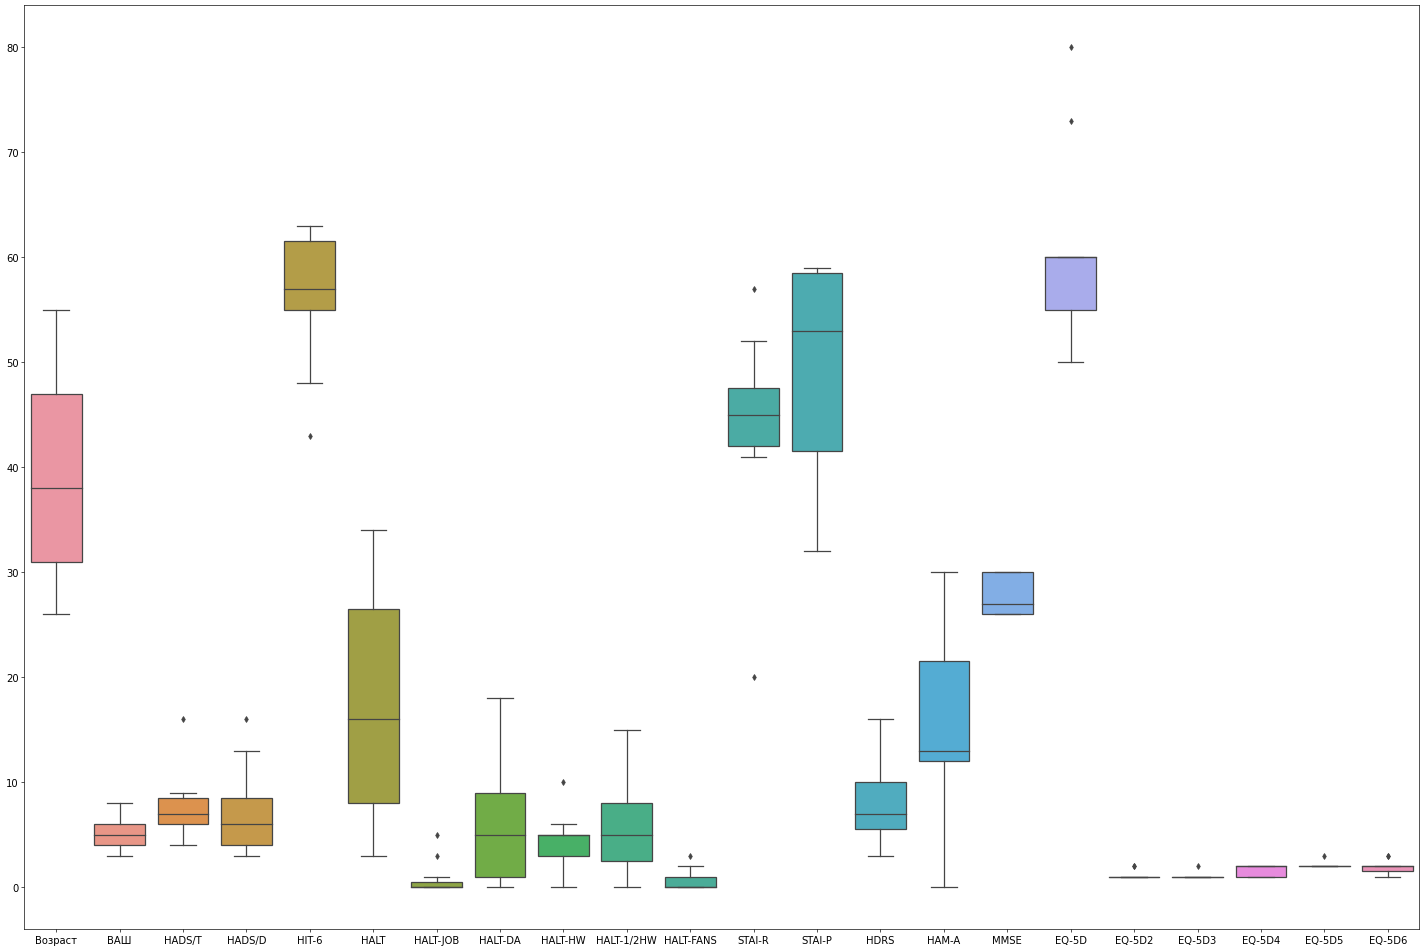

In [6]:
plt.figure(figsize=(30,20), dpi= 60)
boxplot= sns.boxplot(hd)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
from scipy.stats import t
from scipy import stats

### Дальше вычисление CL и р количественных данных 

In [8]:
Par = hd['Возраст']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=54, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)


CL: (32.05031679568506, 45.04059229522403)
t: -5.301638624670116 and p :  0.0003467295220032013


In [9]:
Par = hd['ВАШ']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=7, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (4.030618645843374, 6.151199535974808)
t: -4.011843779479568 and p :  0.002470701220033968


In [10]:
Par = hd['HADS/T']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (5.48504808750495, 9.787679185222323)
t: -3.4837515443405302 and p :  0.005884164153685977


In [11]:
Par = hd['HADS/D']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (4.035906146871984, 9.782275671309835)
t: -3.1724773168682763 and p :  0.009945709727000854


In [12]:
Par = hd['HIT-6']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=45, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (52.3139780068358, 60.7769310840733)
t: 6.079408830828507 and p :  0.00011888508341311486


In [13]:
Par = hd['HALT']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=35, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (9.693107747881282, 25.215983161209625)
t: -5.036915894402557 and p :  0.0005089271585821131


In [14]:
Par = hd['HALT-JOB']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (-0.2986463477058562, 1.9350099840694925)
t: -20.31333500308033 and p :  1.8433897313396538e-09


In [15]:
Par = hd['HALT-DA']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (2.2497755346801207, 9.932042647138061)
t: -2.8476323518185196 and p :  0.017320252691037125


In [16]:
Par = hd['HALT-HW']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (2.20374602230569, 5.978072159512491)
t: -8.157437024080744 and p :  9.92313080574862e-06


In [17]:
Par = hd['HALT-1/2HW']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (2.782159082571884, 8.672386371973571)
t: -3.9891053146005624 and p :  0.0025629981488842


In [18]:
Par = hd['HALT-FANS']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (0.04938374145214908, 1.4051617130933054)
t: -33.765208213696624 and p :  1.2275019211050967e-11


In [19]:
Par = hd['STAI-R']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)


CL: (37.76265822571687, 50.23734177428313)
t: 11.788448473034613 and p :  3.452702871436848e-07


In [20]:
Par = hd['STAI-P']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (42.03777507697649, 55.96222492302351)
t: 12.161238298216027 and p :  2.5765414723206023e-07


In [21]:
Par = hd['HDRS']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (5.047104052497016, 10.225623220230258)
t: -2.894514289875972 and p :  0.01598308621723719


In [22]:
Par = hd['HAM-A']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (9.49915472578828, 21.773572546938993)
t: 1.6832508230603465 and p :  0.12323507700375608


In [23]:
Par = hd['MMSE']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (26.690402892426437, 29.309597107573563)
t: 28.92367451359562 and p :  5.6873742729390275e-11


In [24]:
Par = hd['EQ-5D']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (54.38459007527952, 66.16086447017503)
t: 18.645366827767475 and p :  4.255330896274611e-09


In [25]:
Par = hd['EQ-5D2']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (0.9100580034744394, 1.4535783601619243)
t: -80.49844718999243 and p :  2.138730731388044e-15


In [26]:
Par = hd['EQ-5D3']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (0.8883510134577328, 1.2934671683604488)
t: -109.00000000000003 and p :  1.035525798689497e-16


In [27]:
Par = hd['EQ-5D4']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (1.2974191434533473, 1.9753081292739256)
t: -61.554273380721256 and p :  3.113664568670457e-14


In [28]:
Par = hd['EQ-5D5']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (1.8883510134577328, 2.293467168360449)
t: -98.00000000000003 and p :  2.9975628772488456e-16


In [29]:
Par = hd['EQ-5D6']
meanPar = Par.mean()
df=10
SePar = sem(Par)
b = t.interval(0.95,df,loc=meanPar,scale=SePar)
print('CL:', b)
t_statistic, p_value = stats.ttest_1samp(Par, popmean=11, alternative='two-sided')
print('t:', t_statistic ,'and', 'p : ',p_value)

CL: (1.438388472725568, 2.3797933454562505)
t: -43.03314829119352 and p :  1.1024252927097153e-12


### Корреляция Пирсона

C:\Users\elvin\AppData\Local\Temp\ipykernel_7408\1590119908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


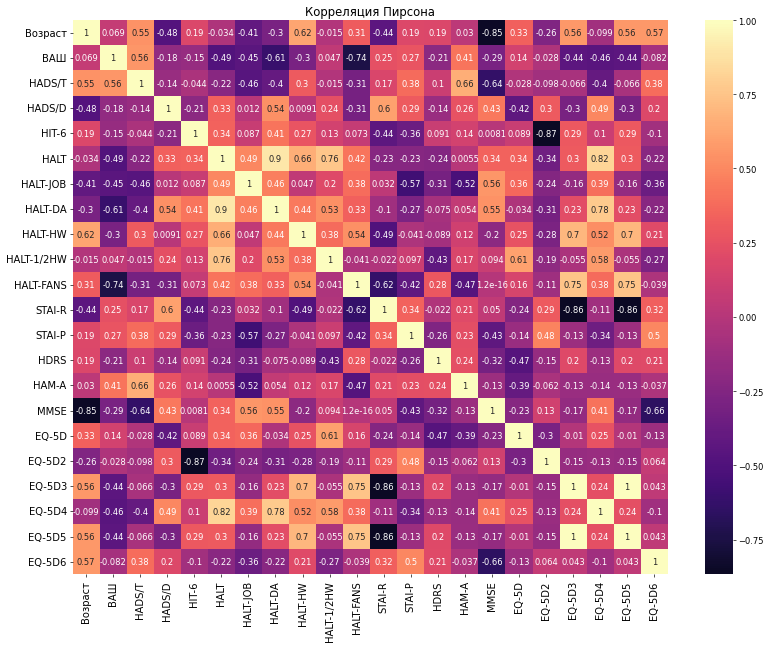

In [30]:
plt.figure(figsize=(16,12), dpi= 60)
sns.heatmap(hd.corr(), xticklabels=hd.corr().columns, yticklabels=hd.corr().columns,cmap='magma',  center=0, annot=True)

# Decorations
plt.title('Корреляция Пирсона', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
a = sex.describe()
b = EQ_5D2.describe()
c = EQ_5D3.describe()
d = EQ_5D4.describe()
e = EQ_5D5.describe()
f = EQ_5D6.describe()
g = HART1.describe()
h = HART2.describe()
i = HART2.describe()
j = HART3.describe()
k = HART4.describe()
l = HART5.describe()
m = HART6.describe()
n = HART7.describe()
o = ADS.describe()

NameError: name 'sex' is not defined

### Вычисления пропорций ккатегориальных данных 

In [42]:
a

,counts,freqs
categories,,
Ж,7,0.636364
М,4,0.363636


In [43]:
b

,counts,freqs
categories,,
1,9,0.818182
2,2,0.181818


In [44]:
c

,counts,freqs
categories,,
1,10,0.909091
2,1,0.090909


In [45]:
d

,counts,freqs
categories,,
1,4,0.363636
2,7,0.636364


In [46]:
e

,counts,freqs
categories,,
2,10,0.909091
3,1,0.090909


In [47]:
f

,counts,freqs
categories,,
1,3,0.272727
2,6,0.545455
3,2,0.181818


In [48]:
g

,counts,freqs
categories,,
3-5,4,0.363636
6-15,7,0.636364


In [49]:
h

,counts,freqs
categories,,
1-5,6,0.545455
11-20,2,0.181818
21,1,0.090909
6-10,2,0.181818


In [50]:
i

,counts,freqs
categories,,
1-5,6,0.545455
11-20,2,0.181818
21,1,0.090909
6-10,2,0.181818


In [51]:
j

,counts,freqs
categories,,
0,1,0.090909
1-5,9,0.818182
6-10,1,0.090909


In [52]:
k

,counts,freqs
categories,,
1-2,3,0.272727
3-5,4,0.363636
6-15,4,0.363636


In [53]:
l

,counts,freqs
categories,,
иногда,3,0.272727
никогда,1,0.090909
часто,7,0.636364


In [55]:
m

,counts,freqs
categories,,
всегда,4,0.363636
иногда,2,0.181818
никогда,2,0.181818
редко,1,0.090909
часто,2,0.181818


In [56]:
n

,counts,freqs
categories,,
иногда,1,0.090909
никогда,1,0.090909
редко,2,0.181818
часто,7,0.636364


In [57]:
o

,counts,freqs
categories,,
да,6,0.545455
нет,5,0.454545


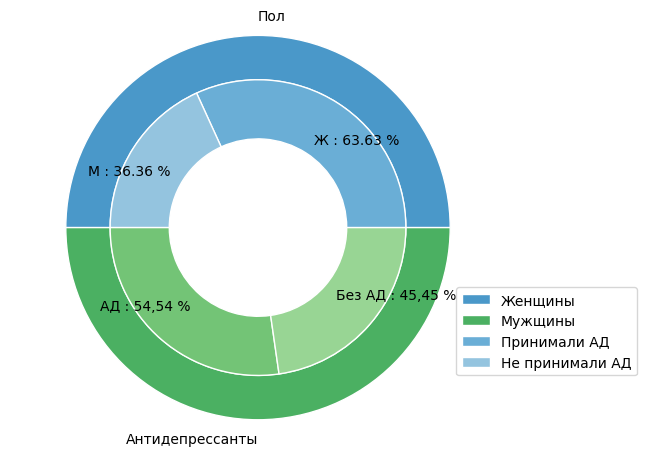

In [67]:
import matplotlib.pyplot as plt

# Make data: I have 2 groups and 4 subgroups
group_names=['Пол', 'Антидепрессанты']
group_size=[11,11]
subgroup_names=['Ж : 63.63 %', 'М : 36.36 %',  'АД : 54,54 %', 'Без АД : 45,45 %']
subgroup_size=[7,4,6,5]

# Create colors
a, b =[plt.cm.Blues, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

subgroup_names_legs=['Женщины', 'Mужщины', 
'Принимали АД', 'Не принимали АД']
plt.legend(subgroup_names_legs,loc=(0.9, 0.1))

# show it
plt.show()

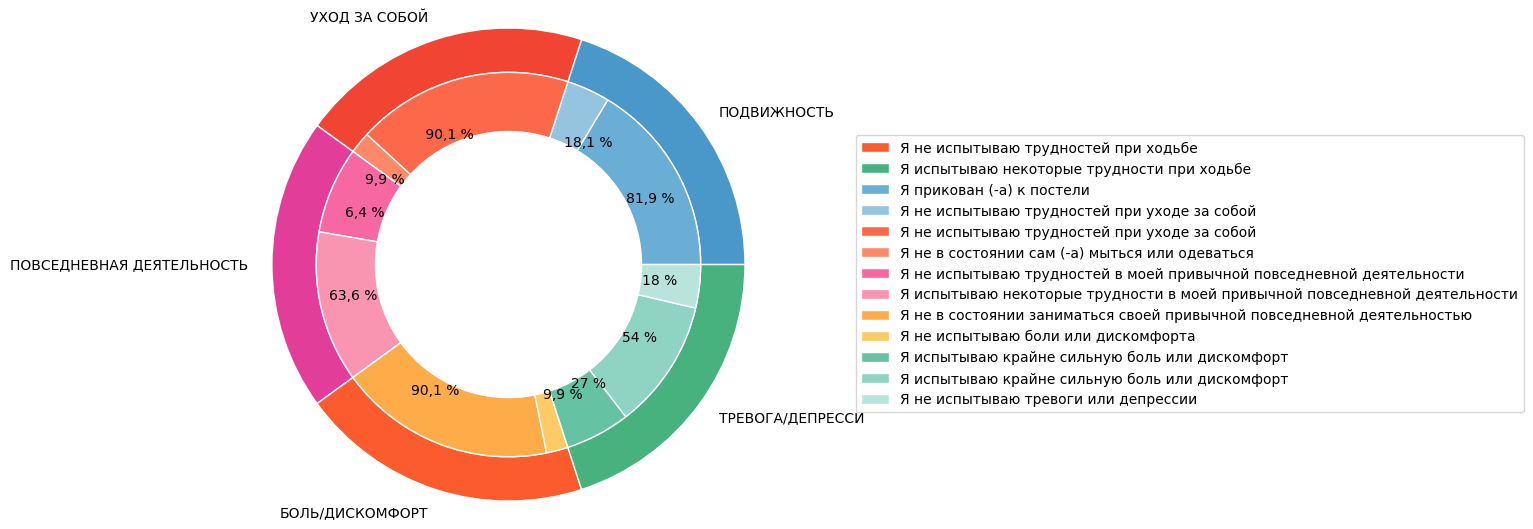

In [98]:
# Make data: I have 5 groups and 15 subgroups
group_names=['ПОДВИЖНОСТЬ', 'УХОД ЗА СОБОЙ', 'ПОВСЕДНЕВНАЯ ДЕЯТЕЛЬНОСТЬ','БОЛЬ/ДИСКОМФОРТ','ТРЕВОГА/ДЕПРЕССИ']
group_size=[11,11,11,11,11]
subgroup_names=['81,9 %', '18,1 %', '', ' 90,1 %', '9,9 %', '',
                '6,4 %', '63,6 %', '', '', '90,1 %', '9,9 %', '27 %', '54 % ', '18 %']
subgroup_size=[9,2,0,10,1,0,4,7,0,0,10,1,3,6,2]

# Create colors
b, c, d, e, f = [plt.cm.Blues, plt.cm.Reds, plt.cm.RdPu, plt.cm.YlOrRd, plt.cm.BuGn]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.6, labels=group_names, colors= [b(0.6), c(0.6), d(0.6), e(0.6), f(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, 
labels=subgroup_names, labeldistance=0.7, colors=[b(0.5), b(0.4), 
b(0.3), c(0.5), c(0.4), c(0.3), d(0.5), d(0.4), d(0.3), e(0.5), e(0.4), e(0.3), f(0.5), f(0.4), f(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

subgroup_names_legs=['Я не испытываю трудностей при ходьбе', 'Я испытываю некоторые трудности при ходьбе', 'Я прикован (-а) к постели', 
'Я не испытываю трудностей при уходе за собой ', 'Я не испытываю трудностей при уходе за собой ', 'Я не в состоянии сам (-а) мыться или одеваться',
                     'Я не испытываю трудностей в моей привычной повседневной деятельности', 'Я испытываю некоторые трудности в моей привычной повседневной деятельности', 
                     'Я не в состоянии заниматься своей привычной повседневной деятельностью',  'Я не испытываю боли или дискомфорта', 'Я испытываю крайне сильную боль или дискомфорт', 'Я испытываю крайне сильную боль или дискомфорт', 'Я не испытываю тревоги или депрессии', 'Я испытываю умеренную тревогу или депрессию', 'Я испытываю крайне сильную тревогу или депрессию ']
plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], subgroup_names_legs, loc=(1.2, 0.1))
plt.show()

# show it
plt.show()

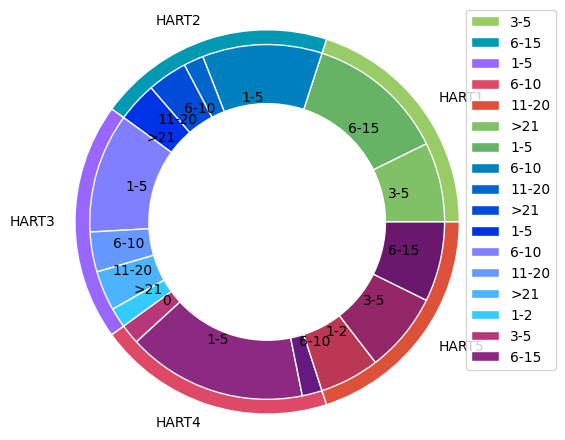

In [113]:
group_names=['HART1','HART2','HART3','HART4','HART5']
group_size=[11,11,11,11,11]
subgroup_names=['3-5', '6-15','1-5','6-10','11-20','>21','1-5','6-10','11-20','>21','0','1-5','6-10','1-2','3-5','6-15']
subgroup_size=[4,7,6,1,2,2,6,2,2,1,1,9,1,3,4,4]

a,b,c,d,e =[plt.cm.summer,plt.cm.winter, plt.cm.cool,plt.cm.magma,plt.cm.inferno]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= [a(0.6), b(0.6),c(0.6), d(0.6), e(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.1, 
labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4), b(0.3), b(0.2),
                                                  c(0.5), c(0.4), c(0.3), c(0.2),
                                                  d(0.5), d(0.4), d(0.3), e(0.5), e(0.4), e(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

subgroup_names_legs=['3-5', '6-15','1-5','6-10','11-20','>21','1-5','6-10','11-20','>21','1-5','6-10','11-20','>21','1-2','3-5','6-15']
plt.legend(subgroup_names_legs,loc=(0.9, 0.1))

# show it
plt.show()

In [140]:
hd.groupby('Пол').mean()

C:\Users\elvin\AppData\Local\Temp\ipykernel_7352\3244013553.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Возраст,ВАШ,HADS/T,HADS/D,HIT-6,HALT,HALT-JOB,HALT-DA,HALT-HW,HALT-1/2HW,HALT-FANS,STAI-R,STAI-P,HDRS,HAM-A,MMSE,EQ-5D,EQ-5D2,EQ-5D3,EQ-5D4,EQ-5D5,EQ-5D6
Пол,,,,,,,,,,,,,,,,,,,,,,
Ж,42.428571,5.285714,9.00,7.714286,57.714286,19.142857,0.142857,6.571429,5.285714,6.571429,0.571429,43.714286,51.428571,7.714286,19.714286,27.428571,51.428571,1.142857,1.142857,1.714286,2.142857,2.142857
М,31.750000,4.750000,5.25,5.500000,54.500000,14.500000,2.000000,5.250000,2.000000,4.250000,1.000000,44.500000,44.750000,7.500000,8.500000,29.000000,60.750000,1.250000,1.000000,1.500000,2.000000,1.500000


### Корреляция chi-square p ,(нет взаимосвязи во всех параметрах)

In [159]:
hd.groupby(['Пол','Антидепрессанты','HART1','HART2','HART3','HART4','HART5','HART6','HART7'])['ВАШ'].count()

Пол  Антидепрессанты  HART1  HART2  HART3  HART4  HART5    HART6    HART7  
Ж    да               6-15   1-5    1-5    3-5    никогда  всегда   никогда    1
                                           6-15   часто    всегда   часто      1
                                                           редко    часто      1
                             21     0      3-5    часто    никогда  редко      1
     нет              3-5    1-5    1-5    1-2    часто    часто    часто      1
                             6-10   1-5    6-15   иногда   часто    иногда     1
                      6-15   11-20  1-5    6-15   часто    всегда   часто      1
М    да               3-5    1-5    1-5    1-2    часто    никогда  часто      1
                      6-15   1-5    1-5    3-5    иногда   иногда   редко      1
     нет              3-5    6-10   1-5    3-5    иногда   всегда   часто      1
                      6-15   11-20  6-10   1-2    часто    иногда   часто      1
Name: ВАШ, dtype: int64

In [160]:
hd.groupby(['Пол','Антидепрессанты','HART1','HART2','HART3','HART4','HART5','HART6','HART7'])['ВАШ'].mean()

Пол  Антидепрессанты  HART1  HART2  HART3  HART4  HART5    HART6    HART7  
Ж    да               6-15   1-5    1-5    3-5    никогда  всегда   никогда    8.0
                                           6-15   часто    всегда   часто      6.0
                                                           редко    часто      5.0
                             21     0      3-5    часто    никогда  редко      4.0
     нет              3-5    1-5    1-5    1-2    часто    часто    часто      4.0
                             6-10   1-5    6-15   иногда   часто    иногда     3.0
                      6-15   11-20  1-5    6-15   часто    всегда   часто      7.0
М    да               3-5    1-5    1-5    1-2    часто    никогда  часто      5.0
                      6-15   1-5    1-5    3-5    иногда   иногда   редко      6.0
     нет              3-5    6-10   1-5    3-5    иногда   всегда   часто      5.0
                      6-15   11-20  6-10   1-2    часто    иногда   часто      3.0
Name: ВАШ, 

In [156]:
hd.groupby(['Пол','Антидепрессанты'])['HIT-6'].mean()

Пол  Антидепрессанты
Ж    да                 60.5
     нет                54.0
М    да                 52.5
     нет                56.5
Name: HIT-6, dtype: float64

In [114]:
from bioinfokit.analys import stat, get_data

In [189]:
import numpy as np
from scipy.stats import chi2_contingency 

In [192]:
hd.groupby(['Пол','Антидепрессанты'])['Антидепрессанты'].count()

Пол  Антидепрессанты
Ж    да                 4
     нет                3
М    да                 2
     нет                2
Name: Антидепрессанты, dtype: int64

In [193]:
observed = np.array([[4, 3], [2, 2]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1             0          1
Log-likelihood     1             0          1



In [194]:
# using Pearson’s chi-squared statistic
# corrected for the Yates’ continuity
chi_val, p_val, dof, expected =  chi2_contingency(observed)
chi_val, p_val, dof, expected

(0.0,
 1.0,
 1,
 array([[3.81818182, 3.18181818],
        [2.18181818, 1.81818182]]))

In [195]:
# without Yates’ correction for continuity
chi_val, p_val, dof, expected =  chi2_contingency(observed, correction=False)
chi_val, p_val, dof, expected

(0.052380952380952334,
 0.818970848901759,
 1,
 array([[3.81818182, 3.18181818],
        [2.18181818, 1.81818182]]))

In [197]:
hd.groupby(['Пол','HART1'])['Антидепрессанты'].count()

Пол  HART1
Ж    3-5      2
     6-15     5
М    3-5      2
     6-15     2
Name: Антидепрессанты, dtype: int64

In [198]:
observed = np.array([[2, 5], [2, 2]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1    0.00350765   0.952773
Log-likelihood     1    0.00350126   0.952816



In [199]:
# using Pearson’s chi-squared statistic
# corrected for the Yates’ continuity
chi_val, p_val, dof, expected =  chi2_contingency(observed)
chi_val, p_val, dof, expected

(0.0035076530612244924,
 0.9527725448755108,
 1,
 array([[2.54545455, 4.45454545],
        [1.45454545, 2.54545455]]))

In [200]:
# without Yates’ correction for continuity
chi_val, p_val, dof, expected =  chi2_contingency(observed, correction=False)
chi_val, p_val, dof, expected

(0.5051020408163265,
 0.47726686709630795,
 1,
 array([[2.54545455, 4.45454545],
        [1.45454545, 2.54545455]]))

In [201]:
hd.groupby(['Пол','HART2'])['Антидепрессанты'].count()

Пол  HART2
Ж    1-5      4
     11-20    1
     21       1
     6-10     1
М    1-5      2
     11-20    1
     6-10     1
Name: Антидепрессанты, dtype: int64

In [202]:
observed = np.array([[4, 1,1,1], [2, 1,0,1]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3      0.916667   0.821404
Log-likelihood     3      1.23725    0.744084



In [204]:
hd.groupby(['Пол','HART3'])['Антидепрессанты'].count()

Пол  HART3
Ж    0        1
     1-5      6
М    1-5      3
     6-10     1
Name: Антидепрессанты, dtype: int64

In [205]:
observed = np.array([[1, 6,0], [0, 3,1]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       2.35714   0.307718
Log-likelihood     2       2.96334   0.227257



In [206]:
hd.groupby(['Пол','HART4'])['Антидепрессанты'].count()

Пол  HART4
Ж    1-2      1
     3-5      2
     6-15     4
М    1-2      2
     3-5      2
Name: Антидепрессанты, dtype: int64

In [207]:
observed = np.array([[1,2,4], [2, 2,0]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       3.79762  0.149747
Log-likelihood     2       5.05634  0.0798051



In [208]:
hd.groupby(['Пол','HART5'])['Антидепрессанты'].count()

Пол  HART5  
Ж    иногда     1
     никогда    1
     часто      5
М    иногда     2
     часто      2
Name: Антидепрессанты, dtype: int64

In [209]:
observed = np.array([[1,1,5], [2, 0,2]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       1.94558   0.378027
Log-likelihood     2       2.22574   0.328615



In [210]:
hd.groupby(['Пол','HART6'])['Антидепрессанты'].count()

Пол  HART6  
Ж    всегда     3
     никогда    1
     редко      1
     часто      2
М    всегда     1
     иногда     2
     никогда    1
Name: Антидепрессанты, dtype: int64

In [211]:
observed = np.array([[3,0,1,1,2], [1,2, 1,0,0]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            4       5.59821   0.23123
Log-likelihood     4       7.14933   0.128204



In [212]:
hd.groupby(['Пол','HART7'])['Антидепрессанты'].count()

Пол  HART7  
Ж    иногда     1
     никогда    1
     редко      1
     часто      4
М    редко      1
     часто      3
Name: Антидепрессанты, dtype: int64

In [214]:
observed = np.array([[1,1,1,4], [0, 0,1,4]])
cat =pd.DataFrame(observed)
res = stat()
res.chisq(cat)

# output
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            3       1.71429   0.633762
Log-likelihood     3       2.43769   0.486656

